In [19]:
from array import array
from os import stat
import numpy as np

import Theorie

DEBUG_INFOS = True  # Theorie.DEBUG_INFOS

# Offline berechnung

# Signalaufbereitung
Im ersten Schritt muss die gespeicherte Sequenz geladen werden.
Zudem wird der DC Offset entfernt und das ganze Signal auf +-1 Normiert.

In [20]:
# read in I/Q samples from binary file
filename = r"Signale\lora16x3.sig"
n_float32 = int(stat(filename).st_size/4)
with open(filename,"rb") as binary_file:
    arr = array('f')
    arr.fromfile(binary_file,n_float32)
signal_rx = np.array(arr.tolist()[::2])+1j*np.array(arr.tolist()[1::2])
signal_rx /= np.amax(np.abs(signal_rx)) # normalize to 1
signal_rx -= np.mean(signal_rx)    # remove DC
print(f"signal size: {signal_rx.shape[0]}")

signal size: 15042560


In [21]:
signal_t = Theorie.downsample_signal(signal_rx,16)
print(f"signal size: {signal_t.shape[0]}")

signal size: 940160


Startposition of the preamble: 912
Startposition of the preamble: 912
Start of the Pramble: 912
Startposition of the preamble: 912
Startposition of the preamble: 912
Startposition of the preamble: 1
Startposition of the preamble: 1
Start of the Pramble: 1
Startposition of the preamble: 1


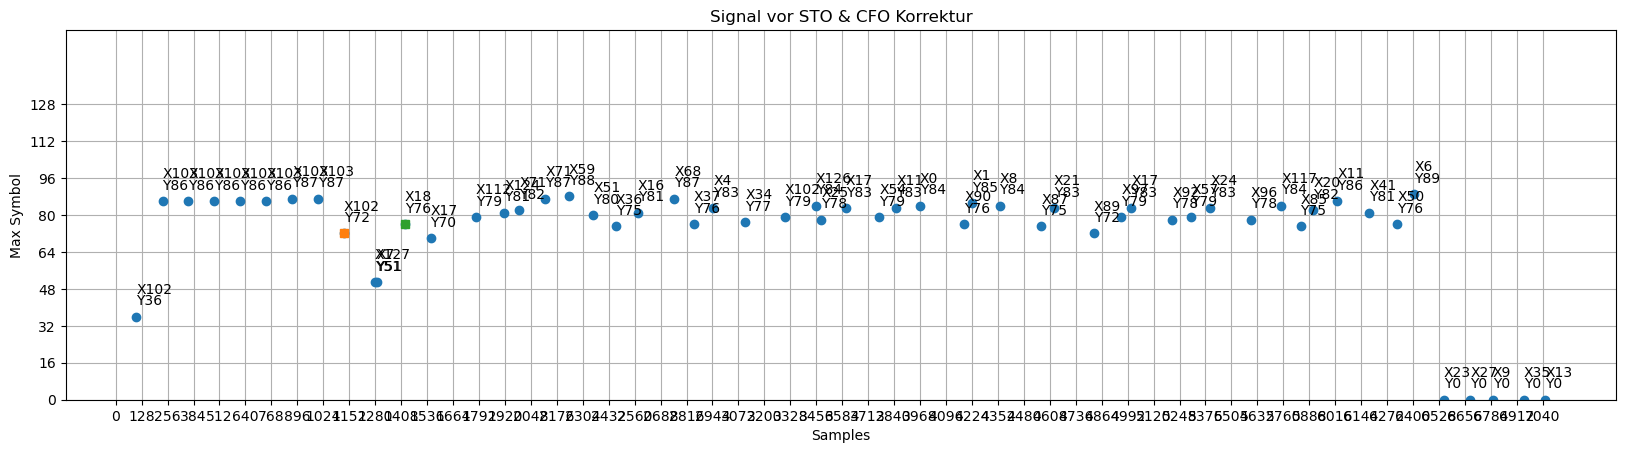

lenght of the signal: 7168
Startposition of the preamble: 1
Startposition of the preamble: 1
Startposition of the preamble: 0
Startposition of the preamble: 0
Start of the Pramble: 0
Startposition of the preamble: 0


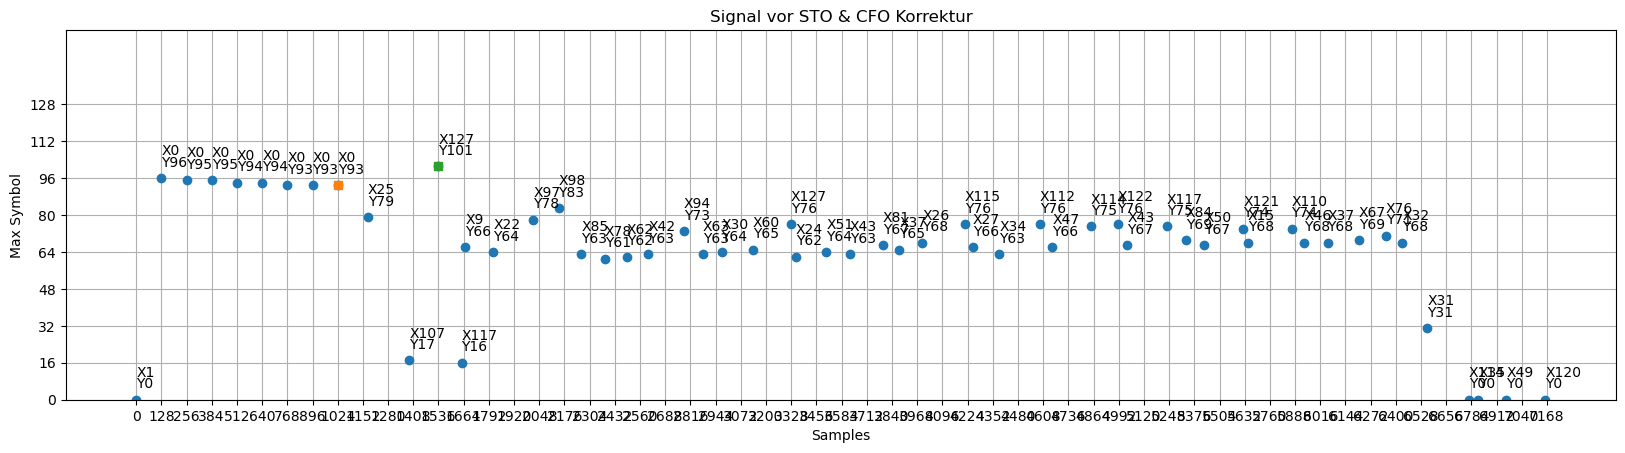

lenght of the signal: 7210
Startposition of the preamble: 0


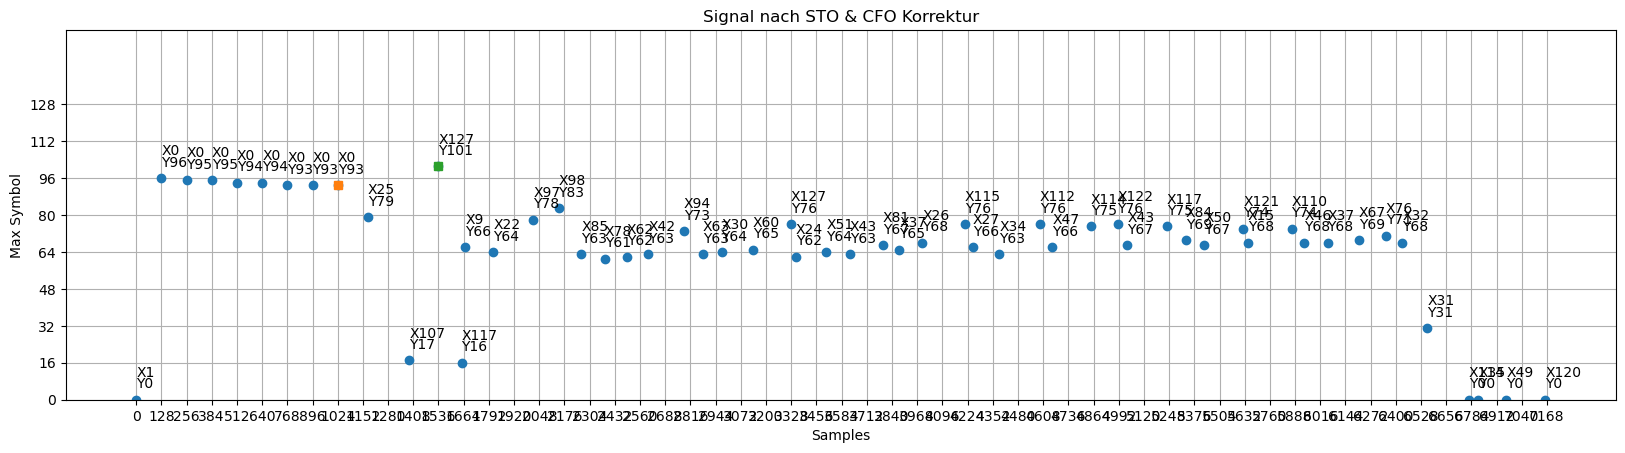

In [22]:
CUT_START_POSITION = 1
signal_ts = signal_t.copy()


if DEBUG_INFOS:
    Theorie.get_start_position(signal_ts)


# cut the signal out of the datafile
signal_ts = Theorie.cut_signal(signal_ts)

if DEBUG_INFOS:
    Theorie.get_start_position(signal_ts)
    Theorie.visualize_symbols(signal_ts,CUT_START_POSITION, "Signal vor STO & CFO Korrektur")
    print(f"lenght of the signal: {len(signal_ts)}")


signal_ts = Theorie.correction_int(signal_ts)

if DEBUG_INFOS:
    Theorie.get_start_position(signal_ts)
    Theorie.visualize_symbols(signal_ts,CUT_START_POSITION, "Signal vor STO & CFO Korrektur")
    print(f"lenght of the signal: {len(signal_ts)}")

Theorie.visualize_symbols(signal_ts,CUT_START_POSITION, "Signal nach STO & CFO Korrektur")



In [23]:
signal_ts = signal_t.copy()

signal_ts = Theorie.cut_signal(signal_ts)

signal_ts = Theorie.correction_int(signal_ts)

data = Theorie.corrected_to_data(signal_ts)

data

Startposition of the preamble: 912
Startposition of the preamble: 912
Startposition of the preamble: 1
Startposition of the preamble: 1


[81,
 42,
 54,
 1,
 1,
 117,
 110,
 94,
 74,
 126,
 95,
 62,
 92,
 32,
 56,
 83,
 75,
 113,
 69,
 58,
 20,
 59,
 66,
 17,
 79,
 19,
 27,
 75,
 22,
 116,
 82,
 26,
 47,
 15,
 78,
 69,
 99,
 108,
 64,
 61,
 44,
 67,
 126,
 77]

In [24]:
signal_test = signal_rx.copy()

data = Theorie.signal_to_data(signal_test,16)

data

Startposition of the preamble: 912
Startposition of the preamble: 912
Startposition of the preamble: 1
Startposition of the preamble: 1


[81,
 42,
 54,
 1,
 1,
 117,
 110,
 94,
 74,
 126,
 95,
 62,
 92,
 32,
 56,
 83,
 75,
 113,
 69,
 58,
 20,
 59,
 66,
 17,
 79,
 19,
 27,
 75,
 22,
 116,
 82,
 26,
 47,
 15,
 78,
 69,
 99,
 108,
 64,
 61,
 44,
 67,
 126,
 77]